In [151]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import scipy.optimize

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [185]:
print(os.listdir("."))


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)



class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

['test_abstract.prism', 'test_obs.prism', 'k_means_results_3L', 'toy_mdp_1_robot_obs.prism', 'combined_results.eps.2022_06_01_21_49_22.0.svg', 'num_tasks_results_corrected', '.git', 'ModelScript', 'k_means_results_6L', 'num_locales_results_corrected', '1R_2T_adv.tra', 'toy_mdp', '#toy_mdp_1_robot.prism#', 'partitioning_diagram.ipe', 'Graphs.ipynb', 'time_abstraction', 'num_robots_results_corrected', 'k_means_results', 'toy_mdp_1_robot_props.prism', 'idle_dump.py', 'model_checking_times_T.eps', 'Nl_data', 'model_checking_time_partition.eps', 'model_checking_times_R.eps', 'NTNR_times.eps', 'nt=nr_results', 'NTNR_results.eps', 'toy_mdp_1_robot.prism', 'combined_results.eps', 'model_results.eps', 'toy_mdp.prism', 'team_reward_partition.eps', 'nt=nr_resutls', 'old results', 'decomposition.png', 'gridsize_results', '.ipynb_checkpoints', 'model_checking_times_L.eps']


Text(0.5, 0, 'Number of grid tiles')

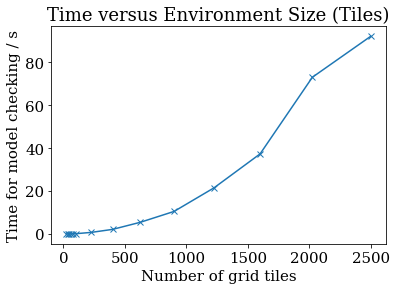

In [43]:
data = np.loadtxt("gridsize_results", delimiter=",")

plt.figure()
plt.plot(data[:,0]**2, data[:,1], marker = "x")
plt.title("Time versus Environment Size (Tiles)")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of grid tiles")

[2. 3. 4. 5. 6. 7. 8. 9.]
[4.70000e-02 2.11000e-01 1.86700e+00 4.09200e+00 1.30420e+01 2.13990e+01
 3.02570e+01 1.16696e+02]


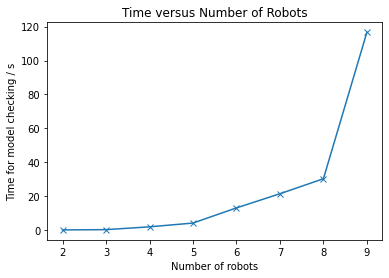

In [4]:
data = np.loadtxt("no_clock_numrobot_results", delimiter=" ")

plt.figure()
plt.plot(data[:,0], data[:,1], marker = "x")
plt.title("Time versus Number of Robots")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of robots")
print(data[:,0])
print(data[:,1])

/home/brendandevlin-hill/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


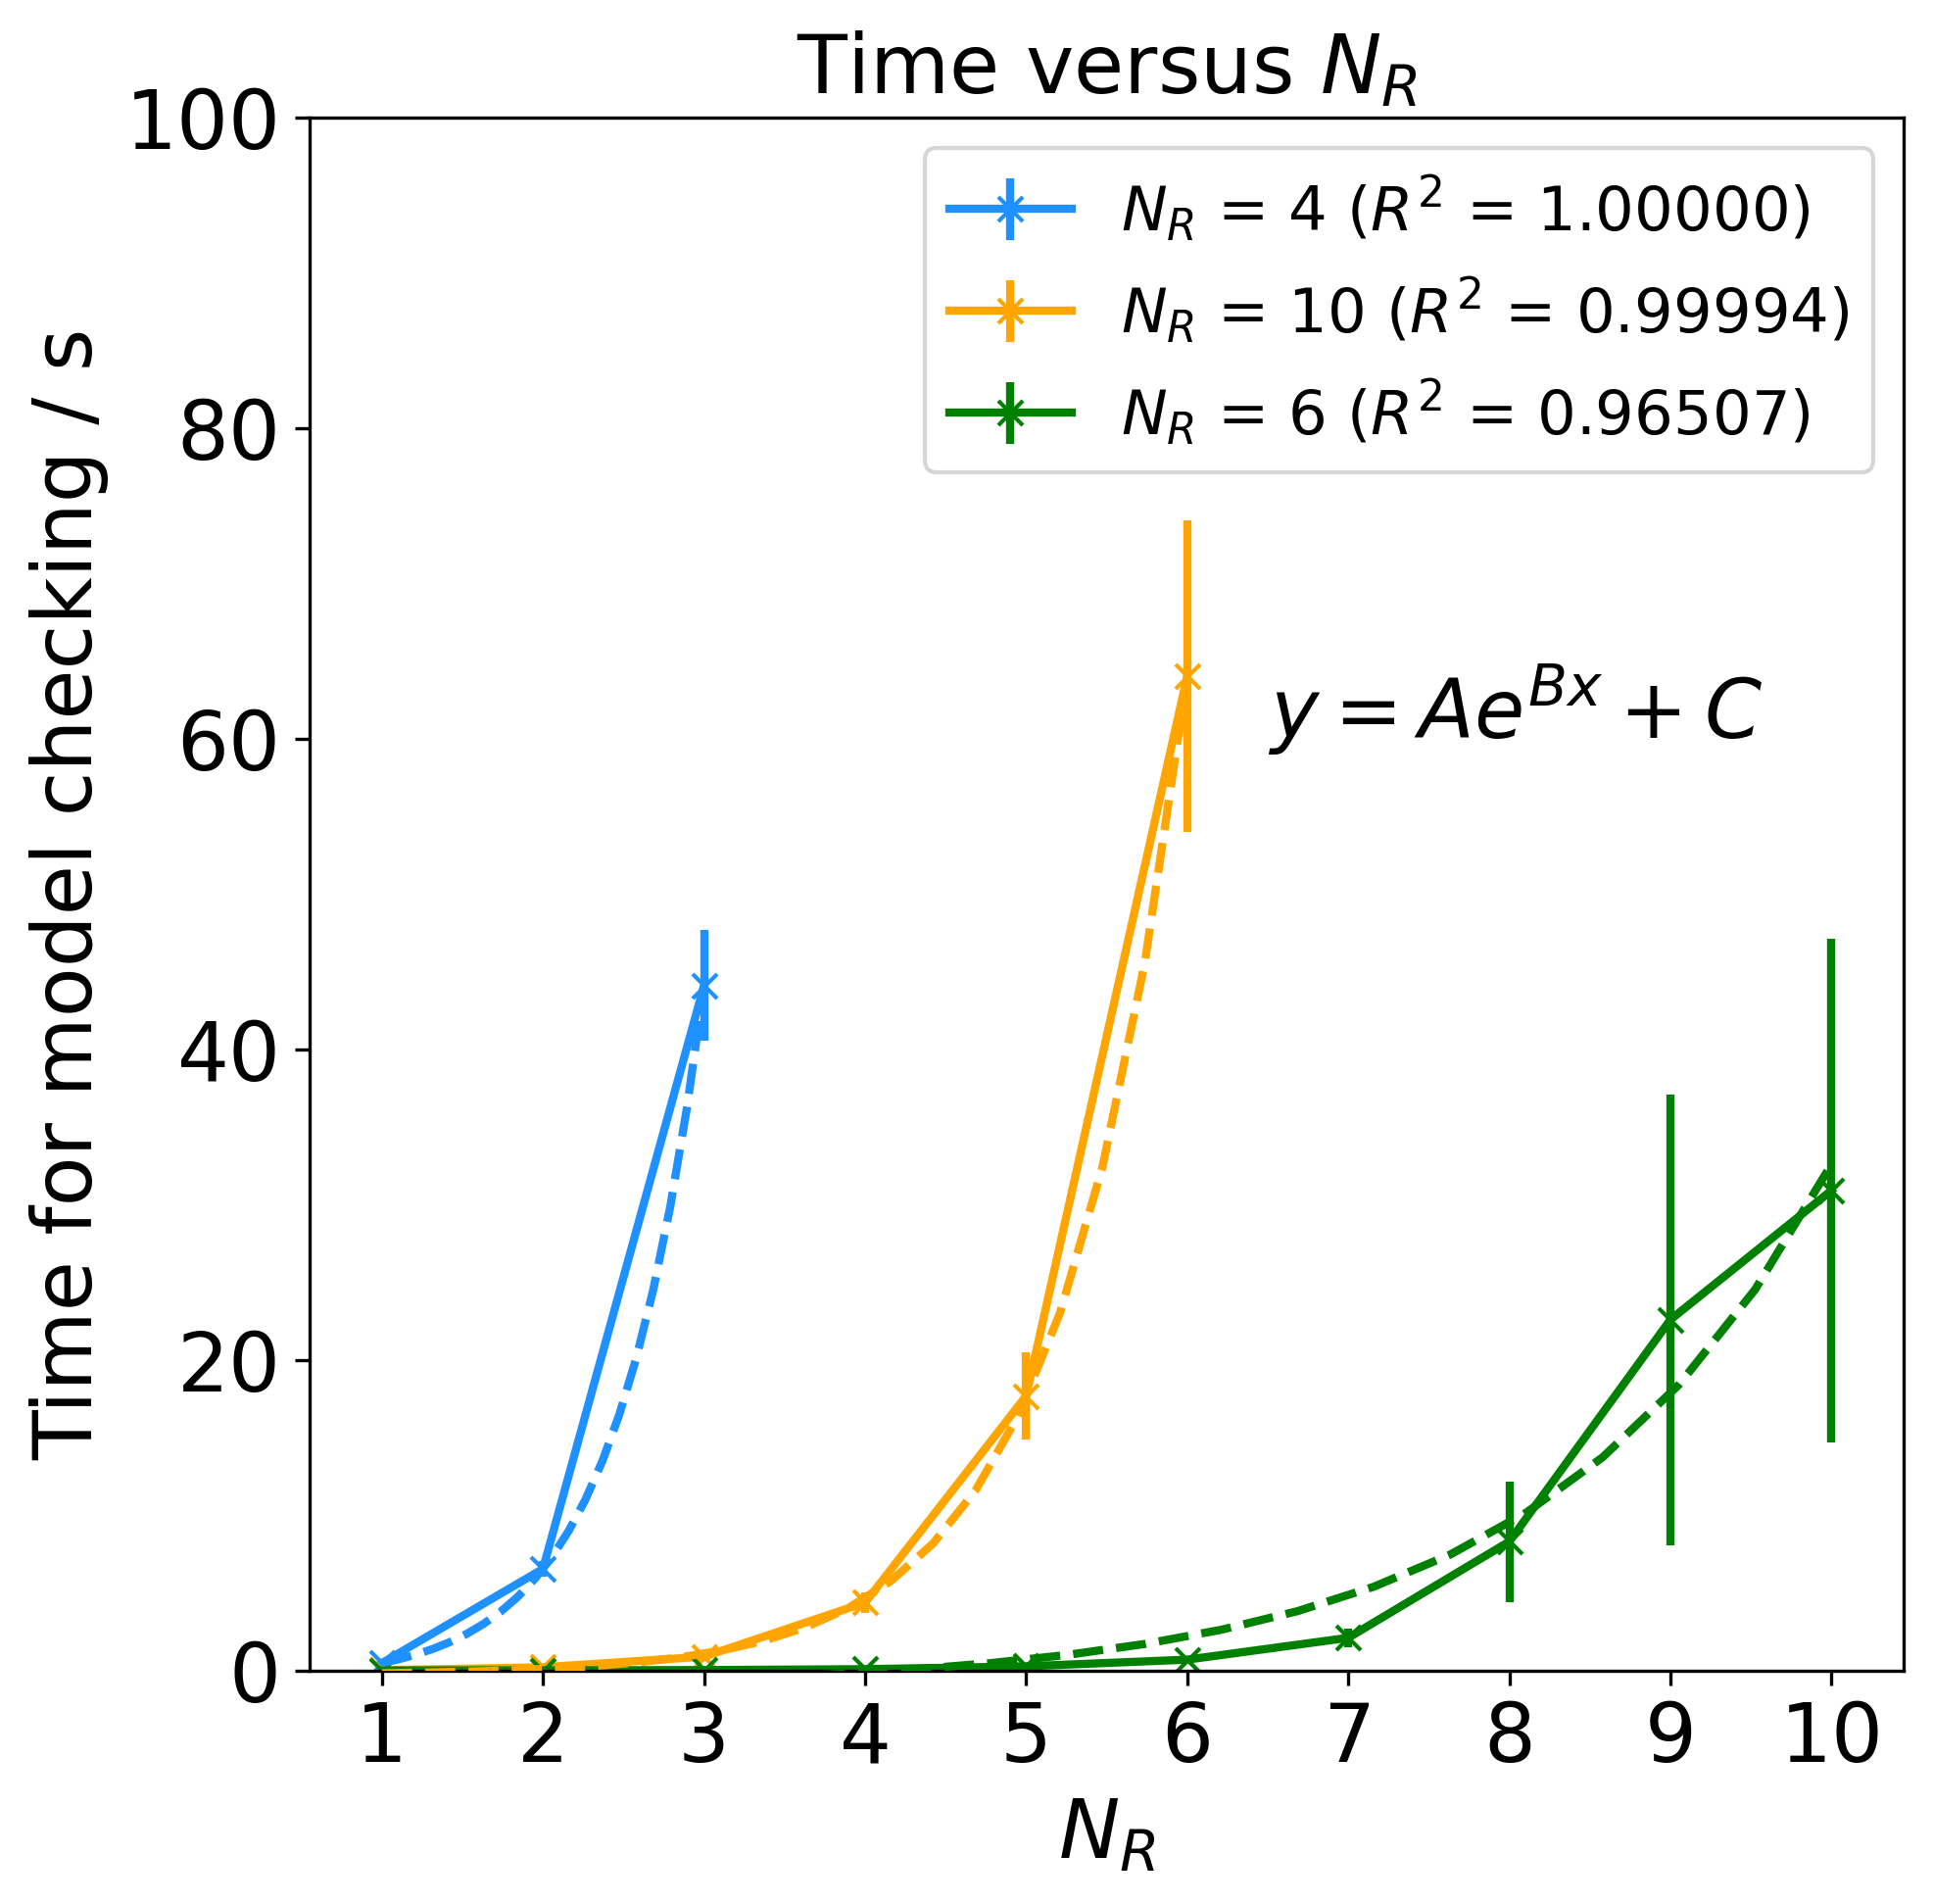

In [72]:
data = np.loadtxt("num_robots_results_corrected", delimiter=" ")

T10 = np.array([0,0,0])
T6 = np.array([0,0,0])
T14 = np.array([0,0,0])
for i in data:
    if i[0] == 10:
        T10 = np.vstack([T10, i[1:]])

    if i[0] == 6:
        T6 = np.vstack([T6, i[1:]])

    if i[0] == 14:
        T14 = np.vstack([T14, i[1:]])

p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T14[1:,0], T14[1:,1], p0)
A, B, C = params
expfits_T14 = exp(np.linspace(min(T14[1:,0]), max(T14[1:,0]),20), A, B, C)
squaredDiffs = np.square(T14[1:,1] - exp(T14[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T14[1:,1] - np.mean(T14[1:,1]))
Rsqr_T14 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

        
p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T10[1:,0], T10[1:,1], p0)
A, B, C = params
expfits_T10 = exp(np.linspace(min(T10[1:,0]),max(T10[1:,0]),20), A, B, C)
squaredDiffs = np.square(T10[1:,1] - exp(T10[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T10[1:,1] - np.mean(T10[1:,1]))
Rsqr_T10 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T6[1:,0], T6[1:,1], p0)
A, B, C = params
expfits_T6 = exp(np.linspace(min(T6[1:,0]),max(T6[1:,0]),20), A, B, C)
squaredDiffs = np.square(T6[1:,1] - exp(T6[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T6[1:,1] - np.mean(T6[1:,1]))
Rsqr_T6 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)





plt.figure(figsize = (7,7), dpi = 300)

plt.plot(np.linspace(1,len(T14[1:,0]),20), expfits_T14, ls = "--", zorder = 4, color = "dodgerblue", lw = 2)
plt.plot(np.linspace(1,len(T10[1:,0]),20), expfits_T10, ls = "--", zorder = 4, color = "orange", lw = 2)
plt.plot(np.linspace(1,len(T6[1:,0]),20), expfits_T6, ls = "--", zorder = 4, color = "g", lw = 2)
, lw = 2
plt.errorbar(T14[1:,0], T14[1:,1], T14[1:,2], marker = "x", label = "$N_R$ = 4 ($R^2$ = {:.5f})".format(Rsqr_T14), color = "dodgerblue", lw = 2)
plt.errorbar(T10[1:,0], T10[1:,1], T10[1:,2], marker = "x", label = "$N_R$ = 10 ($R^2$ = {:.5f})".format(Rsqr_T10), color = "orange", lw = 2)
plt.errorbar(T6[1:,0], T6[1:,1], T6[1:,2], marker = "x", label = "$N_R$ = 6 ($R^2$ = {:.5f})".format(Rsqr_T6), color = "g", lw = 2)

plt.legend(loc = "upper right", fontsize = 15)
plt.title("Time versus $N_R$", fontsize =20)
plt.ylabel("Time for model checking / s", fontsize =20)
plt.xticks(range(1,11), fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0,100)
plt.xlabel("$N_R$", fontsize =20)
plt.text( x = 6.5, y = 60, s = "$y =  Ae^{Bx} + C$", fontsize =20)
;

plt.savefig('model_checking_times_R.eps', format='eps')

0.9906487806930382
0.9998569354285156


''

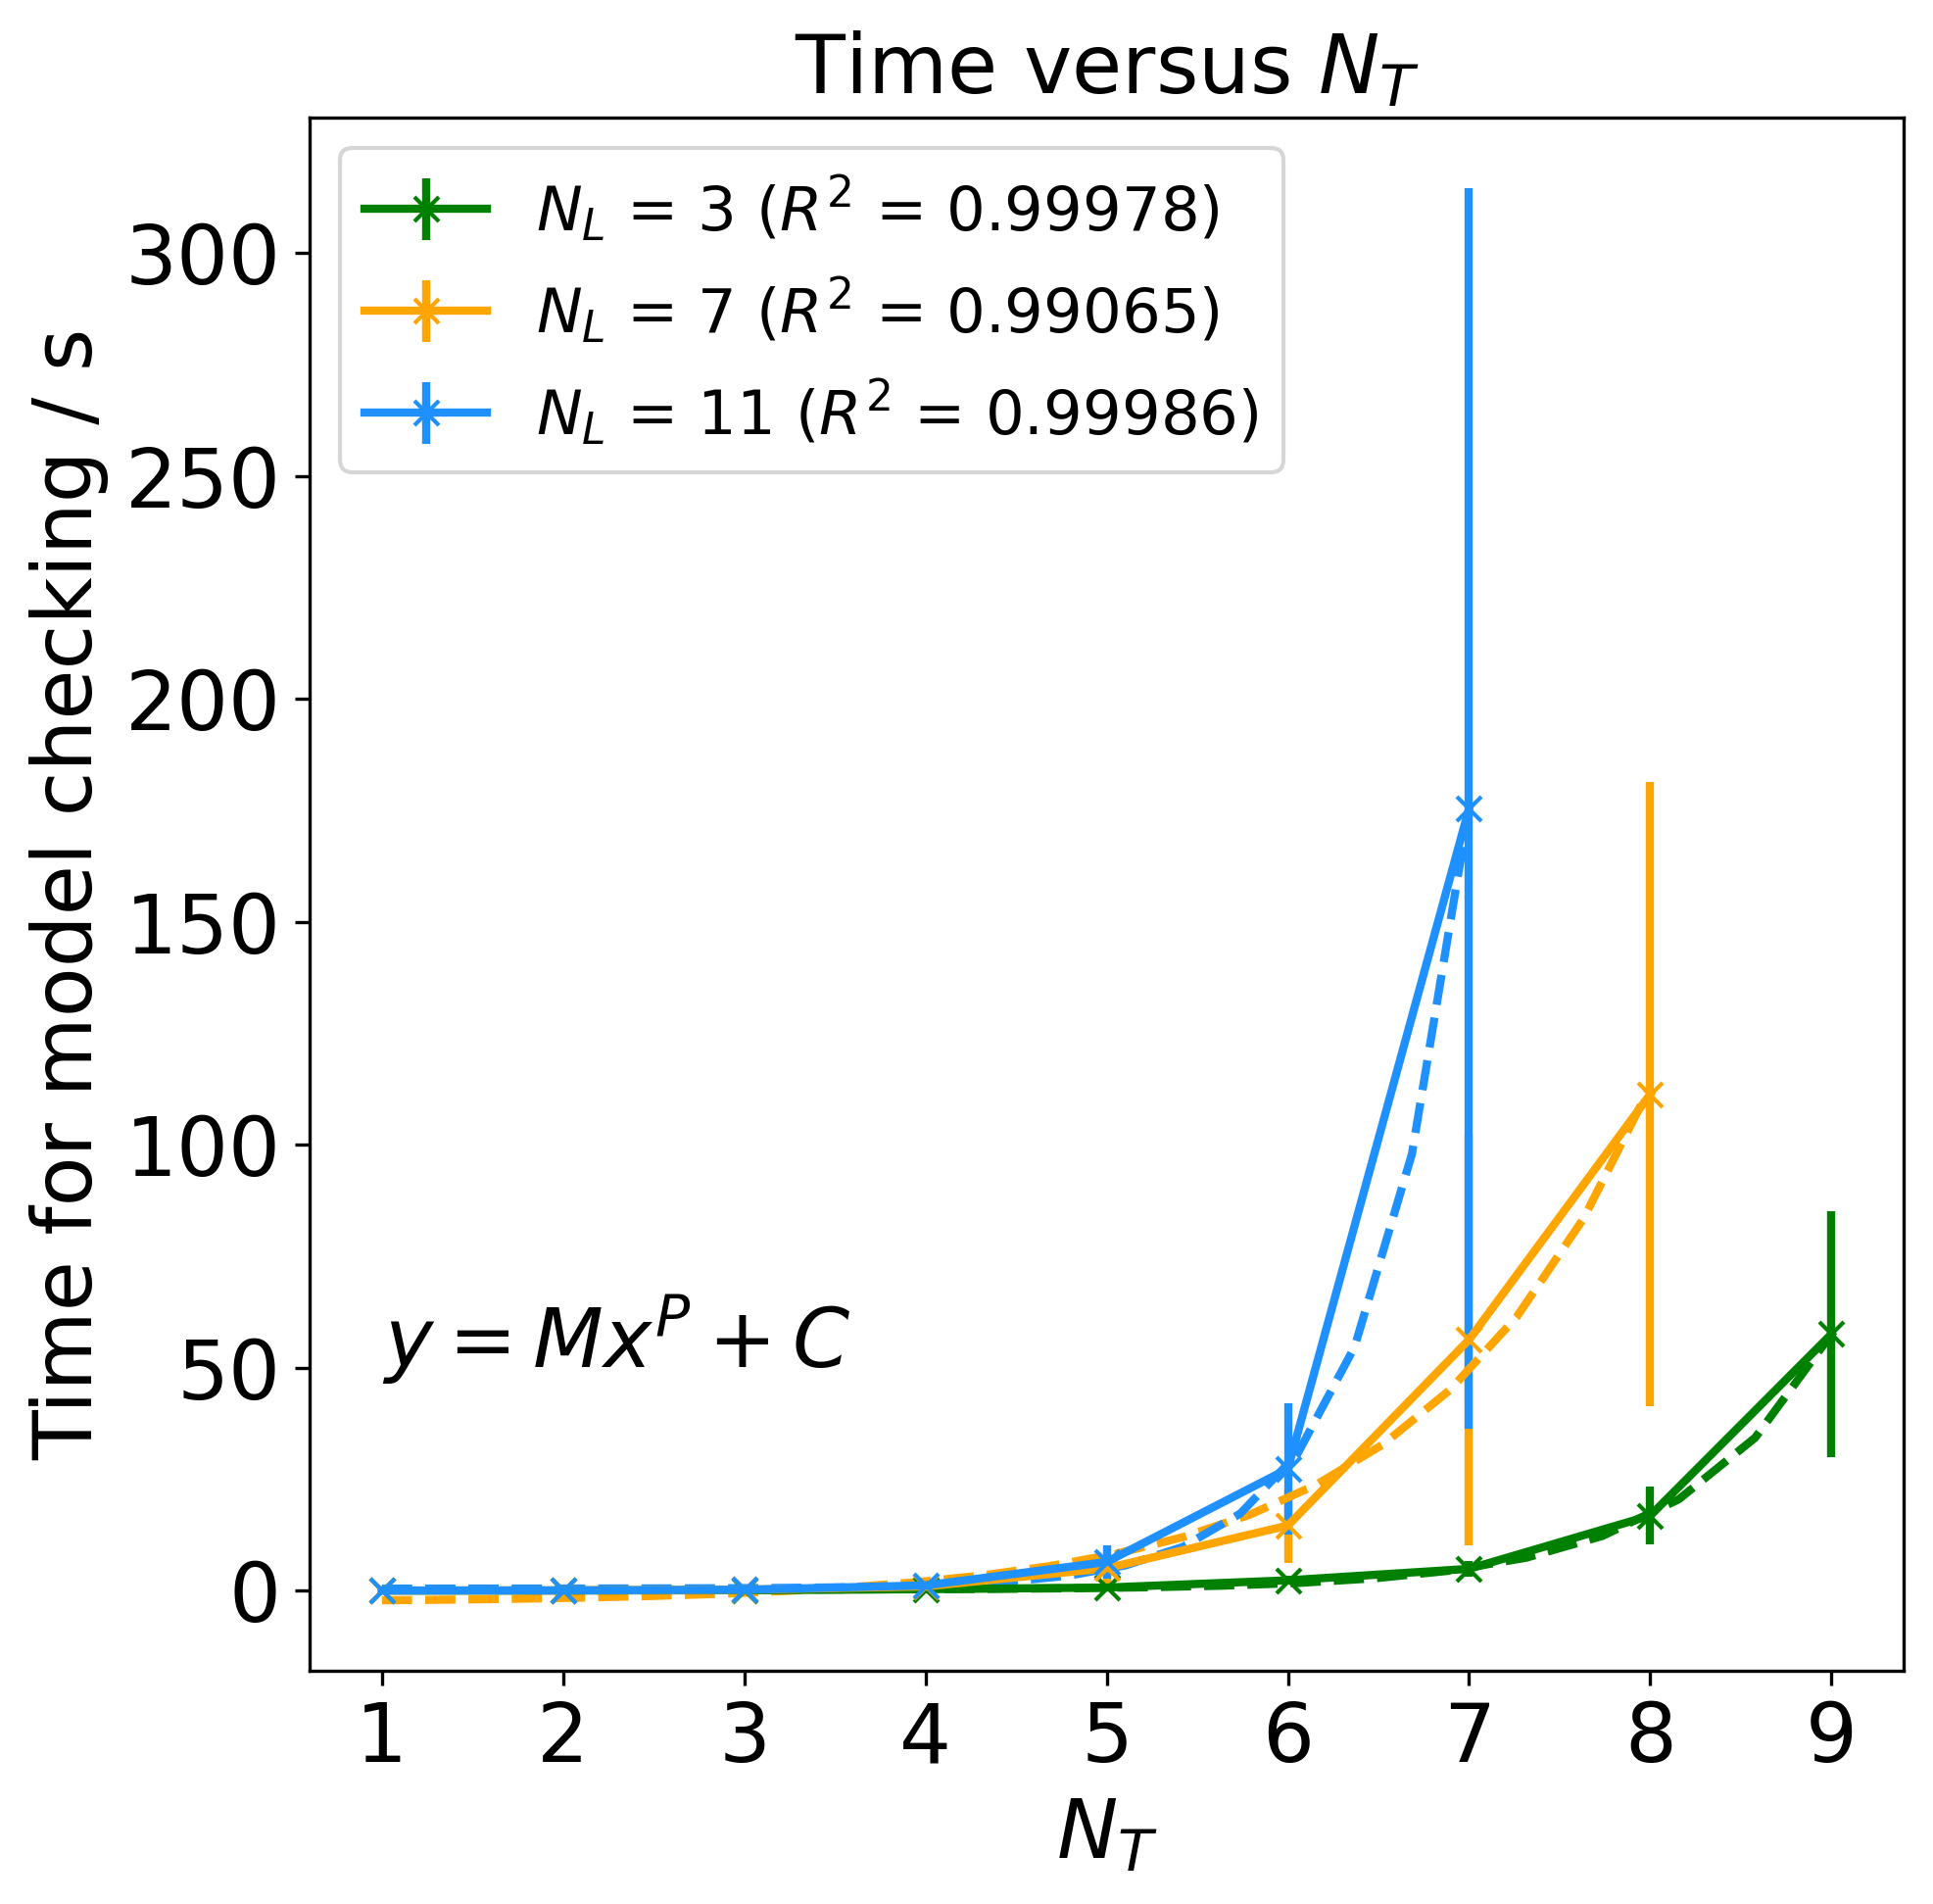

In [7]:
data = np.loadtxt("num_tasks_results_corrected", delimiter=" ")

L3 = np.array([0,0,0])
L7 = np.array([0,0,0])
L11 = np.array([0,0,0])

for i in data:
    if i[0] == 3:
        L3 = np.vstack([L3, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, L3[1:,0], L3[1:,1], p0)
m,p,c = params
powerfits_L3 = exp(np.linspace(min(L3[1:,0]),max(L3[1:,0]),20), m,p,c)
squaredDiffs = np.square(L3[1:,1] - exp(L3[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L3[1:,1] - np.mean(L3[1:,1]))
Rsqr_L3 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


for i in data:
    if i[0] == 7:
        L7 = np.vstack([L7, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, L7[1:,0], L7[1:,1], p0)
m,p,c = params
powerfits_L7 = exp(np.linspace(min(L7[1:,0]),max(L7[1:,0]),20), m,p,c)
squaredDiffs = np.square(L7[1:,1] - exp(L7[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L7[1:,1] - np.mean(L7[1:,1]))
Rsqr_L7 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

print(Rsqr_L7)


for i in data:
    if i[0] == 11:
        L11 = np.vstack([L11, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, L11[1:,0], L11[1:,1], p0)
m,p,c = params
powerfits_L11 = exp(np.linspace(min(L11[1:,0]) ,max(L11[1:,0]),20), m,p,c)
squaredDiffs = np.square(L11[1:,1] - exp(L11[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L11[1:,1] - np.mean(L11[1:,1]))
Rsqr_L11 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

print(Rsqr_L11)


plt.figure(figsize = (7,7), dpi = 300)
plt.plot(np.linspace(1,len(L3[1:,0]),20), powerfits_L3, color = "green", ls = "--", lw = 2)
plt.plot(np.linspace(1,len(L7[1:,0]),20), powerfits_L7, color = "orange", ls = "--", lw = 2)
plt.plot(np.linspace(1,len(L11[1:,0]),20), powerfits_L11, color = "dodgerblue", ls = "--", lw = 2)

plt.errorbar(L3[1:,0], L3[1:,1], L3[1:,2], marker = "x", label = "$N_L$ = 3 ($R^2$ = {:.5f})".format(Rsqr_L3), color = "green", lw = 2)
plt.errorbar(L7[1:,0], L7[1:,1], L7[1:,2], marker = "x", label = "$N_L$ = 7 ($R^2$ = {:.5f})".format(Rsqr_L7), color = "orange", lw = 2)
plt.errorbar(L11[1:,0], L11[1:,1], L11[1:,2], marker = "x", label = "$N_L$ = 11 ($R^2$ = {:.5f})".format(Rsqr_L11), color = "dodgerblue", lw = 2)

plt.legend(loc = "upper left", fontsize = 15)
#plt.title("Time versus Number of Tasks")
plt.ylabel("Time for model checking / s", fontsize = 20)
plt.xticks(range(1,len(L3), 1), fontsize = 20)
plt.yticks(range(0,301,50), fontsize = 20)
#plt.xlim(1.5,len(L3)+0.5)
plt.xlabel("$N_T$", fontsize = 20)
plt.text( x = 1, y = 50, s = "$y = Mx^P + C$", fontsize =20)
plt.title("Time versus $N_T$", fontsize =20)
#plt.savefig('model_checking_times_T.eps', format='eps')
;
# try an exponential fit?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


''

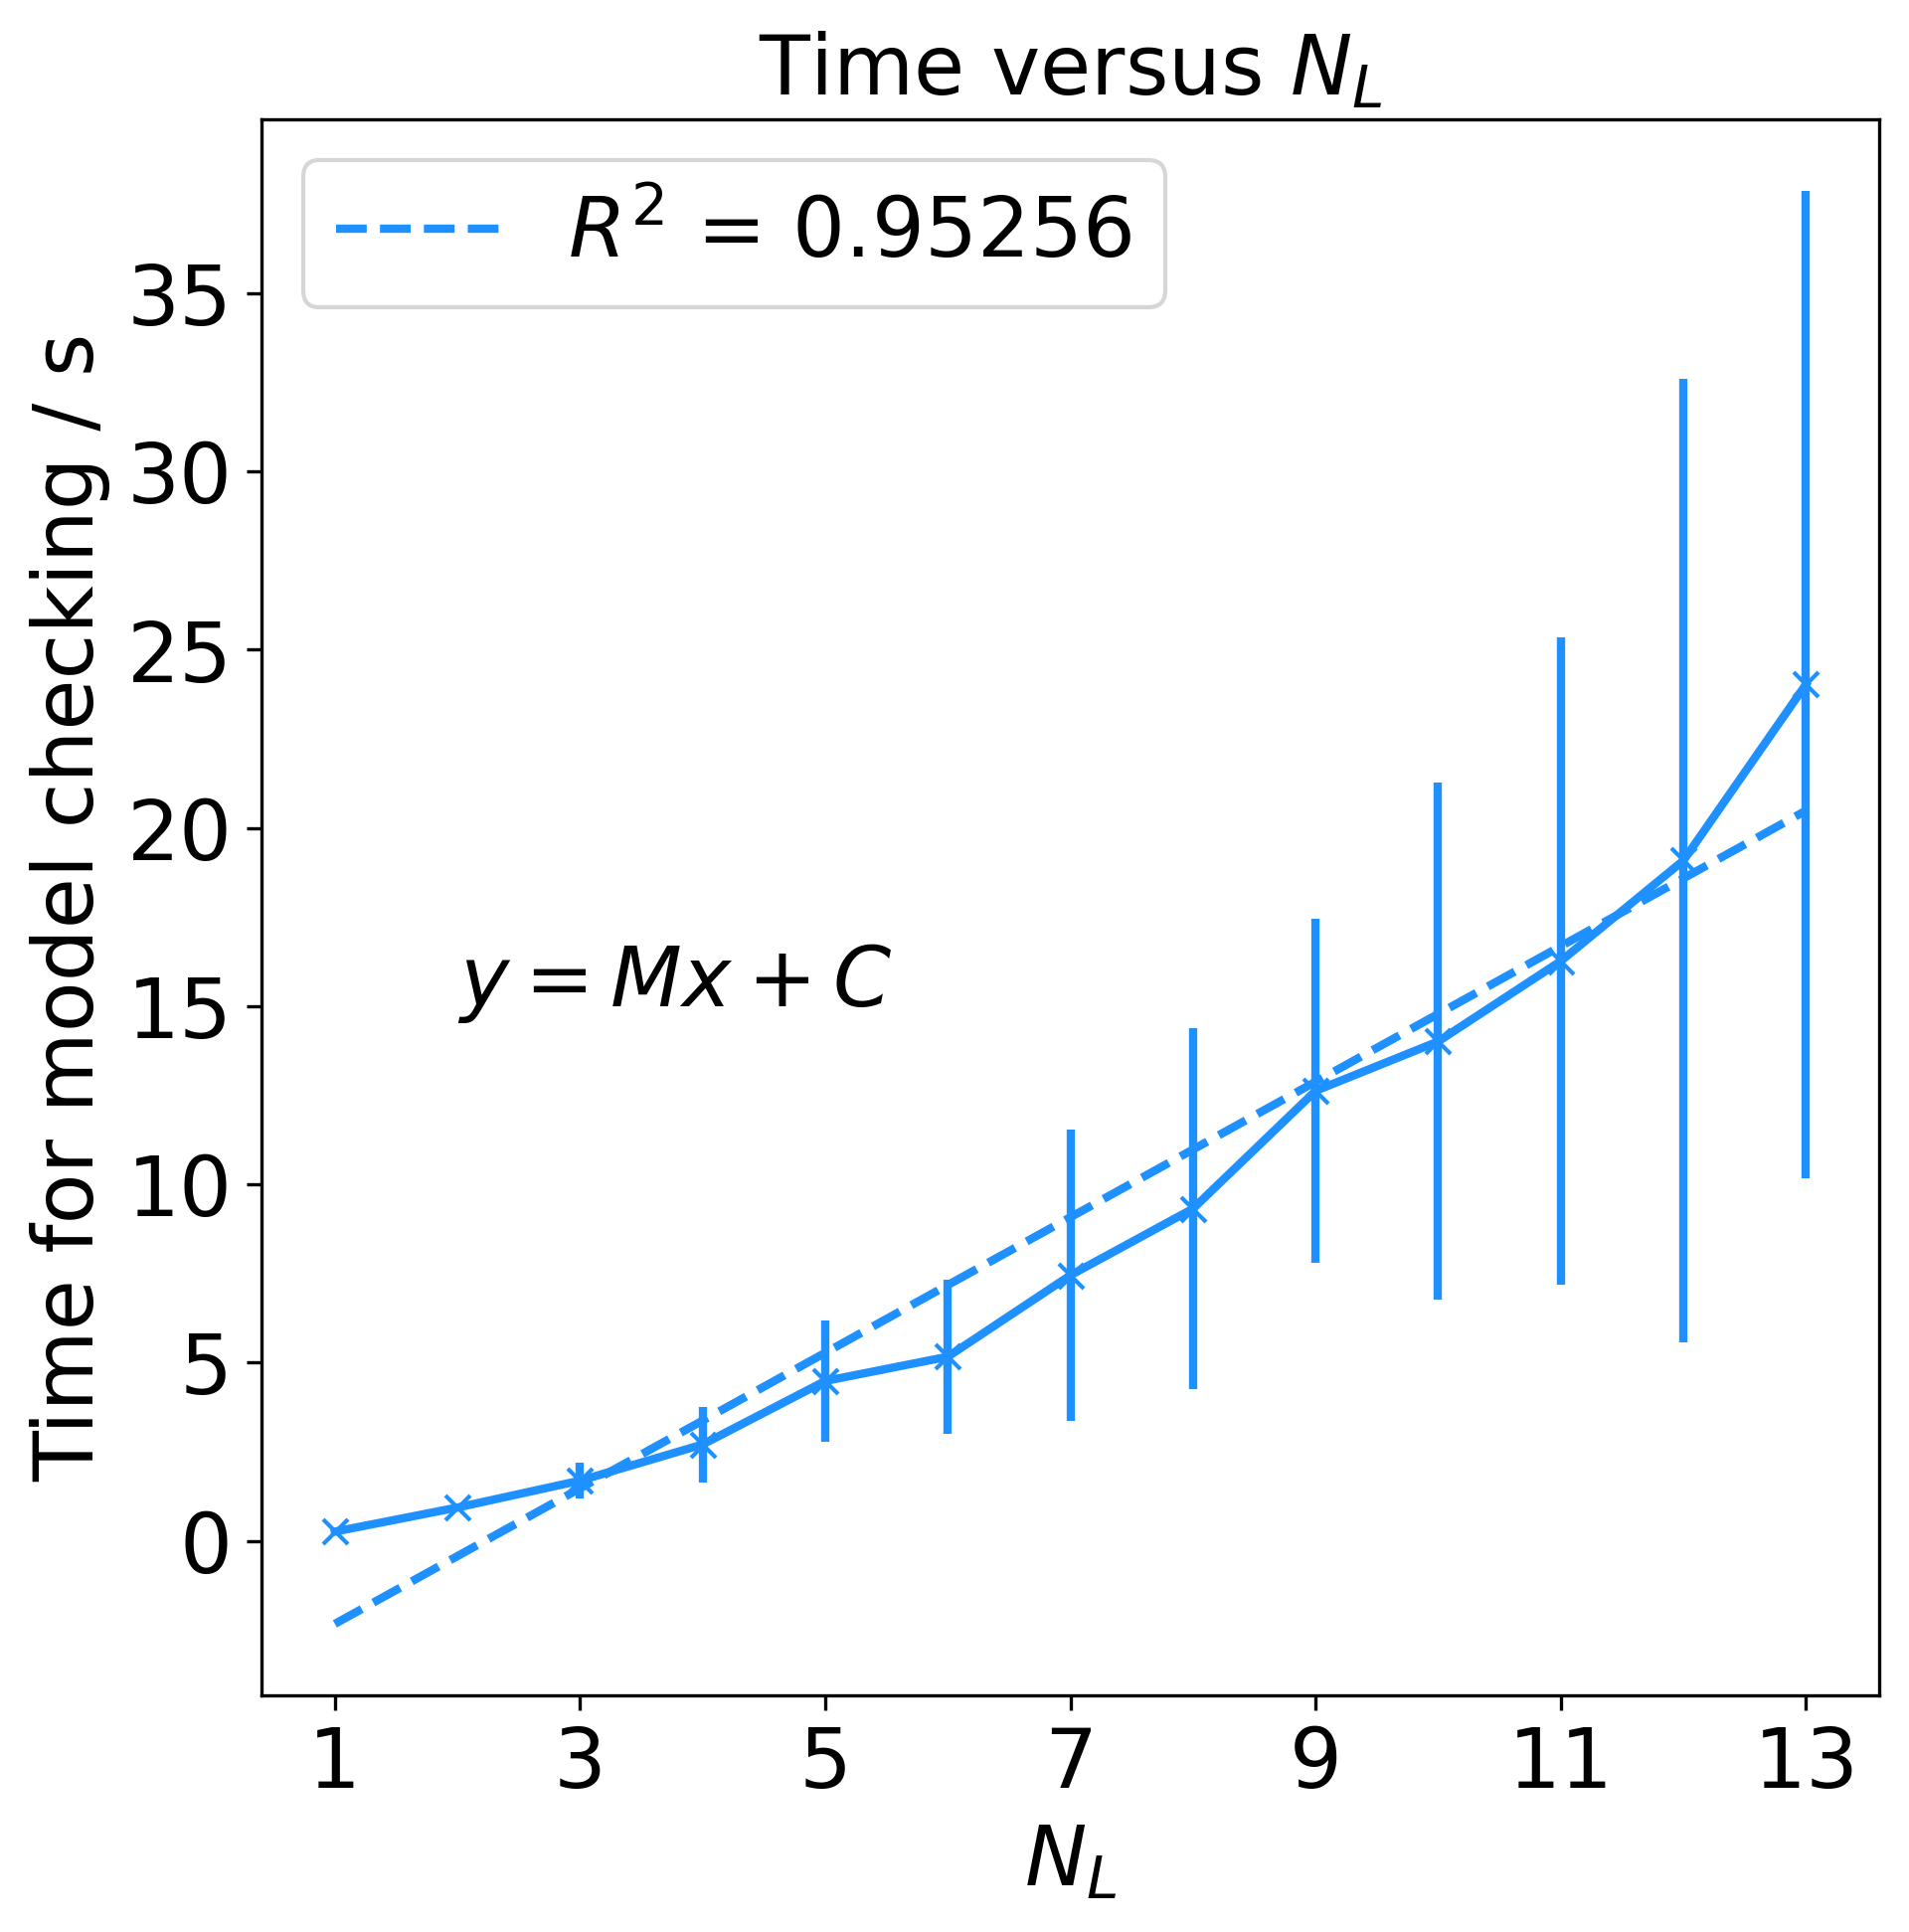

In [84]:
data = np.loadtxt("num_locales_results_corrected", delimiter=" ")

R5 = np.array([0,0,0])

for i in data:
    if i[0] == 5:
        R5 = np.vstack([R5, i[1:]])
        
        
p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(linear_rel, R5[1:,0], R5[1:,1], p0)
m,c = params
linearfits_R5 = linear_rel(np.linspace(min(R5[1:,0]), max(R5[1:,0]),20), m,c)
squaredDiffs = np.square(R5[1:,1] - linear_rel(R5[1:,0], m,c))
squaredDiffsFromMean = np.square(R5[1:,1] - np.mean(R5[1:,1]))
Rsqr_R5 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


R3 = np.array([0,0,0])

# for i in data:
#     if i[0] == 3:
#         R3 = np.vstack([R3, i[1:]])
        
# print(R3)

# p0 = (1, 1) # start with values near those we expect
# params, cv = scipy.optimize.curve_fit(linear_rel, R3[1:,0], R3[1:,1], p0)
# m,c = params
# linearfits_R3 = linear_rel(np.linspace(min(R3[:,0]), max(R3[:,0]),20), m,c)
# squaredDiffs = np.square(R3[1:,1] - linear_rel(R3[1:,0], m,c))
# squaredDiffsFromMean = np.square(R3[1:,1] - np.mean(R3[1:,1]))
# Rsqr_R3 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


plt.figure(figsize = (7,7), dpi = 300)
plt.errorbar(R5[1:,0], R5[1:,1], R5[1:,2], marker = "x", label = "", color  = "dodgerblue", lw = 2)
plt.plot(np.linspace(min(R5[1:,0]), max(R5[1:,0]),20), linearfits_R5, color = "dodgerblue", ls = "--", label = "$R^2$ = {:.5f}".format(Rsqr_R5), lw = 2)



#plt.plot(np.linspace(min(R3[:,0]), max(R3[:,0]),20), linearfits_R3, color = "orange", ls = "--")
#plt.errorbar(R3[0:,0], R3[0:,1], R3[0:,2], marker = "x", label = "3 robots, 6 tasks, $R^2$ = {:.5f}".format(Rsqr_R3), color  = "orange")


plt.legend(loc = "upper left", fontsize = 20)
plt.title("Time versus $N_L$", fontsize = 20)
plt.ylabel("Time for model checking / s", fontsize = 20)
plt.xticks(range(1,len(R5), 2), fontsize = 20)
plt.yticks(range(0, 35+1, 5), fontsize = 20)
plt.xlabel("$N_L$", fontsize = 20)
plt.text( x = 2, y = 15, s = "$y = Mx+C$", fontsize =20)
plt.savefig('model_checking_times_L.eps', format='eps')
;


0.999999457360919


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


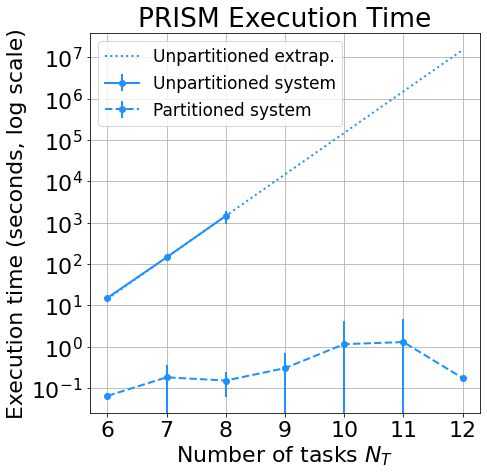

In [209]:
data = np.loadtxt("k_means_results_6L", delimiter=" ")

#data = data[:6]

unpart_times = np.loadtxt("nt=nr_results")[:,0:2]
p0 = [1,1,1]
params, cv = params, cv = scipy.optimize.curve_fit(exp, unpart_times[:,0], unpart_times[:,1], p0)
a, b, c = params
exp_fit = exp(unpart_times[:,0], a,b,c)
squaredDiffs = np.square(unpart_times[:,1]- exp_fit)
squaredDiffsFromMean = np.square(unpart_times[:,1] - np.mean(unpart_times[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)


exp_fit = exp(np.linspace(6,12,5), a, b, c)

unp_x, unp_y = data[:3,0], data[:3,2]
part_x, part_y = data[:,0], data[:,3]
unp_err = data[:3,2], data[:,4]

fig, ax = plt.subplots(figsize = (7,7))



ax.errorbar(data[:3,0], data[:3,1], yerr=data[:3,2], lw = 2, label = "Unpartitioned system", color = "dodgerblue", marker = "o")
ax.errorbar(data[:,0], data[:,3], yerr=data[:,4], lw = 2, label = "Partitioned system", color = "dodgerblue", ls = "--", marker = "o")
ax.plot(np.linspace(6,12,5), exp_fit, ls = "dotted", lw = 2, marker = "", label = "Unpartitioned extrap.", color = "dodgerblue")
ax.legend(fontsize = 17)
ax.set_title("PRISM Execution Time" )
ax.set_xlabel("Number of tasks $N_T$")
ax.set_ylabel("Execution time (seconds, log scale)")

x_space = np.linspace(6, 12, 7)
ax.set_xticks(x_space)
ax.set_yscale('log')

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(1.0,),numticks=10)
ax.yaxis.set_major_locator(locmin)
ax.grid()
fig.savefig('model_checking_time_partition.eps', format='eps', bbox_inches = "tight")

[[5.00000000e+00 3.31951500e+04 2.37230456e+03]
 [6.00000000e+00 3.79167000e+04 2.57339655e+03]
 [7.00000000e+00 4.06665000e+04 2.96624622e+03]
 [8.00000000e+00 4.17583000e+04 2.94810197e+03]]
0.9970709990286745


<ipython-input-69-b04fa016cef3>:6: RuntimeWarning: invalid value encountered in log
  r.append(A*np.log(x+B)+C)


<Figure size 432x288 with 0 Axes>

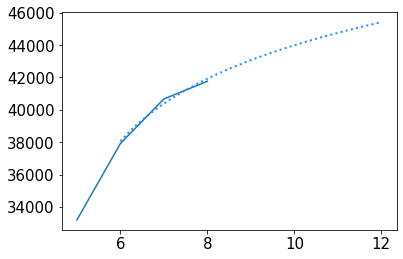

In [155]:
data = np.loadtxt("k_means_results_6L", delimiter=" ")

#data = data[:6]

dat = np.loadtxt("nt=nr_results")

unpart_results = np.column_stack((dat[3:,0], dat[3:,-2:]))
print(unpart_results)

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(unpart_results[:,0], unpart_results[:,1])

# p0 = [1,1,1]
# params, cv = params, cv = scipy.optimize.curve_fit(sqrt_rel, unpart_results[:,0], unpart_results[:,1], p0)
# a, b, c = params
# fit = sqrt_rel(unpart_results[:,0], a,b,c)
# squaredDiffs = np.square(unpart_results[:,1]-fit)
# squaredDiffsFromMean = np.square(unpart_results[:,1] - np.mean(unpart_results[:,1]))
# Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(Rsqr)
# fit = sqrt_rel(np.linspace(0,12,15), a, b,c)


p0 = [1,1,1]
params, cv = params, cv = scipy.optimize.curve_fit(ln_rel, unpart_results[:,0], unpart_results[:,1], p0)
a, b, c = params
fit = ln_rel(unpart_results[:,0], a,b,c)
squaredDiffs = np.square(unpart_results[:,1]-fit)
squaredDiffsFromMean = np.square(unpart_results[:,1] - np.mean(unpart_results[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)

space = np.linspace(6,12,100)

fit = ln_rel(space, a, b,c)
plt.plot(space, fit, ls = "dotted", lw = 2, marker = "", label = "Unpartitioned extrapolation", color = "dodgerblue")
plt.show()

<ipython-input-69-b04fa016cef3>:6: RuntimeWarning: invalid value encountered in log
  r.append(A*np.log(x+B)+C)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


0.9970709990286745


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


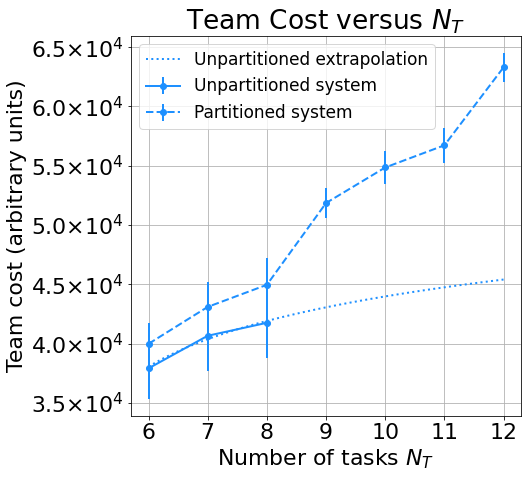

In [196]:
data = np.loadtxt("k_means_results_6L", delimiter=" ")

p0 = [1,1,1]
params, cv = params, cv = scipy.optimize.curve_fit(ln_rel, unpart_results[:,0], unpart_results[:,1], p0)
a, b, c = params
fit = ln_rel(unpart_results[:,0], a,b,c)
squaredDiffs = np.square(unpart_results[:,1]-fit)
squaredDiffsFromMean = np.square(unpart_results[:,1] - np.mean(unpart_results[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)

space = np.linspace(6,12,100)
fit = ln_rel(space, a,b,c)

#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

unp_x, unp_y = data[:3,0], data[:3,5]
part_x, part_y = data[:,0], data[:,7]
unp_err, part_err = data[:3,6], data[:,8]


fig, ax = plt.subplots(figsize = (7,7))

ax.errorbar(unp_x, unp_y, yerr=unp_err, lw = 2, label = "Unpartitioned system", color = "dodgerblue", marker = "o")
ax.errorbar(part_x, part_y, yerr=part_err, lw = 2, label = "Partitioned system", color = "dodgerblue", ls = "--", marker = "o")
ax.plot(space, fit, ls = "dotted", lw = 2, marker = "", label = "Unpartitioned extrapolation", color = "dodgerblue")


# f = mtick.ScalarFormatter(useOffset=True, useMathText=True)
# g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.2e' % x))

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))
#ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))

#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax.legend(fontsize = 17)
ax.set_title("Team Cost versus $N_T$")
ax.set_xlabel("Number of tasks $N_T$")
ax.set_ylabel("Team cost (arbitrary units)")
# ax.set_yticklabels(fontsize = 15)
# ax.set_xticklabels(fontsize = 20)

x_space = np.linspace(6, 12, 7)
ax.set_xticks(x_space)
ax.grid()
fig.savefig('team_reward_partition.eps', format='eps', bbox_inches = "tight")
#plt.yscale('log')

[[2.00000000e+00 3.67500000e-02 5.15630682e-03 1.52695500e+04
  1.16439085e+03]
 [3.00000000e+00 5.09000000e-02 6.87677250e-03 2.15560000e+04
  1.51981255e+03]
 [4.00000000e+00 1.66000000e-01 6.03042287e-02 2.67896500e+04
  2.48947226e+03]
 [5.00000000e+00 8.82100000e-01 6.20144338e-02 3.31951500e+04
  2.37230456e+03]
 [6.00000000e+00 1.53024000e+01 9.63420905e-01 3.79167000e+04
  2.57339655e+03]
 [7.00000000e+00 1.45788400e+02 6.95127629e+00 4.06665000e+04
  2.96624622e+03]
 [8.00000000e+00 1.46916710e+03 5.10386564e+02 4.17583000e+04
  2.94810197e+03]]
0.999999457360919
0.9733857897809827


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


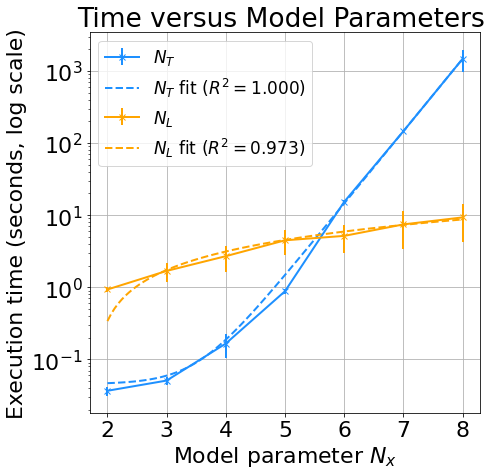

In [211]:
#graph with NR NT and NL

Nl_data = np.loadtxt("num_locales_results_corrected", delimiter=" ")
Nt_Nr_data = np.loadtxt("nt=nr_results", delimiter = " ")

Nl_data = Nl_data[1:8,1:]
print(Nt_Nr_data)

unpart_times = Nt_Nr_data[:,0:2]
p0 = [1,1,1]
params, cv = params, cv = scipy.optimize.curve_fit(exp, unpart_times[:,0], unpart_times[:,1], p0)
a, b, c = params
exp_fit = exp(unpart_times[:,0], a,b,c)
squaredDiffs = np.square(unpart_times[:,1]- exp_fit)
squaredDiffsFromMean = np.square(unpart_times[:,1] - np.mean(unpart_times[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)
exp_fit = exp(np.linspace(2, 8,100), a,b,c)


p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(linear_rel, Nl_data[:,0], Nl_data[:,1], p0)
m,c = params
linear_fit = linear_rel(Nl_data[:,0], m,c)
squaredDiffs = np.square(Nl_data[:,1] - linear_fit)
squaredDiffsFromMean = np.square(Nl_data[:,1] - np.mean(Nl_data[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)
linear_fit = linear_rel(np.linspace(2,8,100),m,c)



fig, ax = plt.subplots(figsize = (7,7))

ax.plot(np.linspace(2, 8,100), exp_fit, ls = "--", color = "dodgerblue", label = "$N_T$ fit ($R^2=1.000$)", lw = 2)
ax.errorbar(Nt_Nr_data[:,0], Nt_Nr_data[:,1], Nt_Nr_data[:,2], label = "$N_T$", marker = "x", color = "dodgerblue", lw = 2)
ax.plot(np.linspace(2, 8,100), linear_fit, ls = "--", color = "orange", label = "$N_L$ fit ($R^2=0.973$)", lw = 2)
ax.errorbar(Nl_data[:,0], Nl_data[:,1], Nl_data[:,2], label = "$N_L$", marker = "x", color = "orange", lw = 2)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,3,1]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = 17)
ax.set_yscale("log")
ax.set_title("Time versus Model Parameters ")
ax.set_ylabel("Execution time (seconds, log scale)")
ax.set_xlabel("Model parameter $N_x$")
x_space = np.linspace(2, 8, 7)
ax.set_xticks(x_space)
ax.grid()

fig.savefig('NTNR_times.eps', format='eps', bbox_inches = "tight")


[[2.00000000e+00 1.52695500e+04 1.16439085e+03]
 [3.00000000e+00 2.15560000e+04 1.51981255e+03]
 [4.00000000e+00 2.67896500e+04 2.48947226e+03]
 [5.00000000e+00 3.31951500e+04 2.37230456e+03]
 [6.00000000e+00 3.79167000e+04 2.57339655e+03]
 [7.00000000e+00 4.06665000e+04 2.96624622e+03]
 [8.00000000e+00 4.17583000e+04 2.94810197e+03]]
0.985111469634268


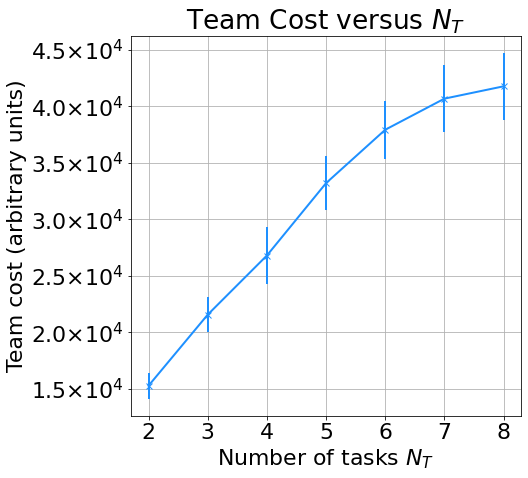

In [208]:
#graph with NR NT and NL

Nl_data = np.loadtxt("Nl_data", delimiter=" ")
Nt_Nr_data = np.loadtxt("nt=nr_results", delimiter = " ")

Nl_data = Nl_data[1:8,:]
Nl_data = np.column_stack((Nl_data[:,0], Nl_data[:,-2:]))
#print(Nt_Nr_data)

Nt_Nr_results = np.column_stack((Nt_Nr_data[:,0], Nt_Nr_data[:,-2:]))
print(Nt_Nr_results)
p0 = [1,1,1]
params, cv = params, cv = scipy.optimize.curve_fit(sqrt_rel, Nt_Nr_results[:,0], Nt_Nr_results[:,1], p0)
a, b, c = params
sqrt_fit = sqrt_rel(Nt_Nr_results[:,0], a,b,c)
squaredDiffs = np.square(Nt_Nr_results[:,1]-sqrt_fit)
squaredDiffsFromMean = np.square(Nt_Nr_results[:,1] - np.mean(Nt_Nr_results[:,1]))
Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(Rsqr)

# p0 = [1,1,1]
# params, cv = params, cv = scipy.optimize.curve_fit(ln_rel, Nt_Nr_results[:,0], Nt_Nr_results[:,1], p0)
# a, b, c = params
# sqrt_fit = ln_rel(Nt_Nr_results[:,0], a,b,c)
# squaredDiffs = np.square(Nt_Nr_results[:,1]-sqrt_fit)
# squaredDiffsFromMean = np.square(Nt_Nr_results[:,1] - np.mean(Nt_Nr_results[:,1]))
# Rsqr = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(Rsqr)

space = np.linspace(2,8,100)
sqrt_fit = sqrt_rel(space, a, b,c)

fig, ax = plt.subplots(figsize = (7,7))


ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))

#plt.plot(space, sqrt_fit, ls = "--", color = "dodgerblue", label = "$y=Ax^2+C$ fit", lw = 2)
ax.errorbar(Nt_Nr_results[:,0], Nt_Nr_results[:,1], Nt_Nr_results[:,2], marker = "x", color = "dodgerblue", lw = 2)
#plt.legend(fontsize = 15)
ax.set_title("Team Cost versus $N_T$")
ax.set_ylabel("Team cost (arbitrary units)")
ax.set_xlabel("Number of tasks $N_T$")
# ax.xticks(fontsize = 20)
# ax.yticks(fontsize = 20)
x_space = np.linspace(2, 8, 7)
ax.set_xticks(x_space)
ax.grid()

fig.savefig('NTNR_results.eps', format='eps', bbox_inches = "tight")
# plt.show()


[[ 3.00000000e+00  1.58000000e-02  1.51512376e-02  7.29500000e+02
   1.14796117e+03]
 [ 4.00000000e+00 -3.96000000e-02  2.04068616e-02  1.09620000e+03
   1.70387428e+03]
 [ 5.00000000e+00 -3.19500000e-01  6.89974637e-02  5.54600000e+02
   1.03265882e+03]
 [ 6.00000000e+00 -2.06010000e+00  5.09923612e-01  1.62100000e+02
   4.86300000e+02]
 [ 7.00000000e+00 -1.40054000e+01  3.83470328e+00  2.58500000e+02
   5.23684495e+02]
 [ 8.00000000e+00 -1.23105900e+02  2.80362862e+01  3.66500000e+02
   7.26450170e+02]]


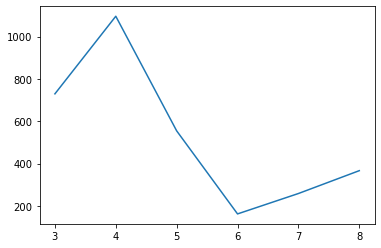

In [143]:
result_change_data = np.loadtxt("k_means_results_3L")
result_change_data = np.column_stack((result_change_data[:-2,0], result_change_data[:-2,-4:]))
print(result_change_data)
plt.plot(result_change_data[:,0], result_change_data[:,3])

In [66]:
def exp(x_vals, A=1, B=1, C=0):
    
    r = []
    
    for x in x_vals:
        r.append(A * np.exp(B*x) + C)
    
    return np.array(r)

In [67]:
def power_law(x_vals, m, p, c):
    
    r = []
    
    for x in x_vals:
        r.append(m*x**p + c)
        
    return np.array(r)

In [68]:
def linear_rel(x_vals, m,c):
    
    r = []
    
    for x in x_vals:
        r.append(m*x + c)
        
    return np.array(r)

(0.0, 100.0)

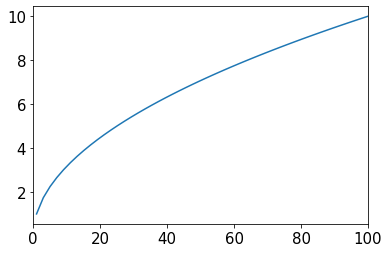

In [69]:
def ln_rel(x_vals, A, B, C):
    
    r = []
    
    for x in x_vals:
        r.append(A*np.log(x+B)+C)
        
    return np.array(r)

y  = [np.sqrt(x) for x in np.linspace(1,100)]#ln_rel(np.linspace(1,100), 10,6,1)
plt.plot(np.linspace(1,100), y)
plt.xlim(0,100)

In [70]:
def sqrt_rel(x_vals, A, B, C):
    
    r = []
    
    for x in x_vals:
        r.append(A*np.sqrt(x)+C)
        
    return np.array(r)

plt.plot(np.linspace(1,100), sqrt_rel(np.linspace(1,100), 1,1,1,1))
plt.plot(np.linspace(1,100), sqrt_rel(np.linspace(1,100), 1,20,1,10))

plt.xlim(0,100)

TypeError: sqrt_rel() takes 4 positional arguments but 5 were given